# БДЗ девятый раздел

In [21]:
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from array import array
import numpy as np
import math
import pandas as pd

In [22]:
X = pd.read_excel(open('../table.xls', 'rb'), sheet_name='A - aaup')['A15'].to_numpy()
Y = pd.read_excel(open('../table.xls', 'rb'), sheet_name='A - aaup')['A13'].to_numpy()

n = len(X)


In [23]:
data = pd.read_excel("../table.xls",sheet_name='A - aaup' )
X_grp = data.groupby(['A5']).groups
for key in X_grp:
    arr = [0]*len(X_grp[key])
    for i in range(len(X_grp[key])):
        j = X_grp[key][i]
        arr[i] = Y[j]
    X_grp[key] = arr


In [24]:
X_grp

{270: [334], 277: [303], 290: [354], 293: [329], 300: [318], 301: [362], 307: [290], 308: [329], 309: [391], 314: [335], 316: [379], 318: [342], 319: [357], 320: [308], 321: [335], 322: [350], 324: [318, 353], 325: [358], 326: [395], 332: [363], 333: [379], 335: [350, 342, 349, 333], 336: [335], 337: [340], 338: [338, 364], 339: [366], 340: [380], 341: [356, 318], 342: [347, 369], 348: [365, 384, 371, 379], 350: [377, 360], 351: [396, 363, 375, 339], 352: [382, 347, 393, 387], 353: [371, 373], 354: [363, 355, 343], 355: [340], 356: [372, 341], 358: [363], 359: [363, 367, 382], 360: [363], 361: [364], 362: [403, 364], 364: [366, 392], 365: [381], 367: [398], 368: [400, 399], 369: [397], 370: [379, 390, 428], 371: [372], 372: [426, 427, 400], 373: [443, 441, 382, 386], 374: [422], 375: [440, 397], 376: [391], 377: [404, 426, 409], 378: [407, 400, 386], 379: [405, 377, 378, 399], 380: [394], 382: [374], 383: [405, 375], 384: [389], 385: [416, 386, 423], 387: [392, 402], 388: [418, 386], 3

## 9.1 Простейшая линейная регрессионная модель
### 9.1.1. Точечные оценки линейной регрессионной модели
#### а) Рассчитать точечные оценки параметров линейной регрессионной модели

In [25]:
k_XY = 0
for i in range(n):
    k_XY += 1/n * (X[i] - X. mean()) * (Y[i] - Y.mean())
rho_XY = k_XY / (X.std() * Y.std())

beta_0 = Y.mean() - rho_XY * Y.std()  * X.mean() / X.std()
beta_1 = rho_XY * Y.std()/X.std()
print("beta_0 = {z:.3f}".format(z = beta_0))
print("beta_1 = {z:.3f}".format(z = beta_1))


beta_0 = 488.993
beta_1 = 0.465


#### г) Рассчитать показатели вариации, используемые в регрессионном анализе

In [26]:
# http://datalearning.ru/index.php/textbook?cid=1&mid=5&topic=7
D_YX = 0

for key in X_grp:
    D_YX += len(X_grp[key]) / n * ((np.array(X_grp[key])).mean() - Y.mean())**2
    
D_res = 0
for i in range(n):
    D_res += 1/n * (Y[i] - (beta_0 + beta_1*X[i]))**2
    
D_Y = 0 
for i in range(n):
    D_Y += 1/n * (Y[i] - Y.mean())**2

print(D_YX) # непрпаильно

D_YX = D_Y - D_res
print(D_YX)
print(D_res)
print(D_Y)

13331.73055137026
4589.956334189024
9440.535573858097
14030.49190804712


#### д) Проверить правило сложения дисперсий

#### е) Рассчитать показатели тесноты связи между факторным и результативным признаками

In [ ]:
print("Коэффициент детерминации: {z}".format(z = (D_YX/D_Y)**(1/2)))
print("Кореляционное отношение: {z}".format(z = (D_YX/D_Y)))

Коэффициент детерминации: 0.9877824021639867
Кореляционное отношение: 0.9757140740248559


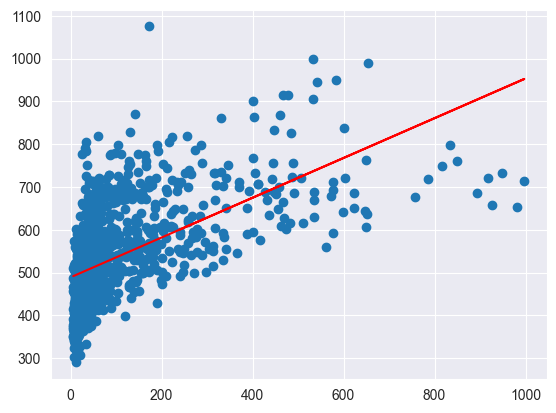

In [27]:
# просто посмотреть
plt.scatter(X, Y)
lin_reg = beta_1*X + beta_0
plt.plot(X, lin_reg, color='red')

## 9.1.2. Интервальные оценки линейной регрессионной модели
### б) Рассчитать доверительные интервалы для параметров линейной регрессионной модели


In [28]:
new_D_res = 0
for i in range(n):
    new_D_res += 1/(n-2) * (Y.mean() + rho_XY * Y.std()/X.std() * (X[i] - X.mean()) - Y[i])**2

X_sum = 0
for i in range(len(X)):
    X_sum += (X[i])**2 
alpha = [0.01, 0.05, 0.1]
for a in alpha:
    beta_0_lower = beta_0 - sps.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res * X_sum / (n**2 * X.var()))
    beta_0_upper = beta_0 + sps.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res * X_sum / (n**2 * X.var()))
    beta_1_lower = beta_1 - sps.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res / (n**2 * X.var())) 
    beta_1_upper = beta_1 + sps.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res / (n**2 * X.var())) 
    print(f"Нижняя граница b0: {beta_0_lower}")
    print(f"Верхняя граница b0: {beta_0_upper}")
    print(f"Нижняя граница b1: {beta_1_lower}")
    print(f"Верхняя граница b1: {beta_1_upper}")

Нижняя граница b0: 479.629
Верхняя граница b0: 498.357
Нижняя граница b1: 0.463
Верхняя граница b1: 0.466
Нижняя граница b0: 481.873
Верхняя граница b0: 496.114
Нижняя граница b1: 0.463
Верхняя граница b1: 0.466
Нижняя граница b0: 483.019
Верхняя граница b0: 494.967
Нижняя граница b1: 0.464
Верхняя граница b1: 0.466


### г) Построить диаграмму рассеяния признаков x и y. Нанести на диаграмму функцию регрессии f(x), а также нижние и верхние границы линии регрессии flow(x) и fhigh(x) на уровне значимости α = 0.1


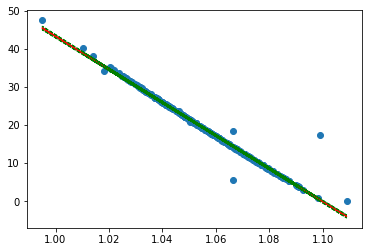

In [ ]:
X_sum = 0

for i in range(len(X)):
    X_sum += (X[i])**2 
alpha = 0.1
flow = []
fhigh = []
for i in range(n):
    flow.append((Y.mean() + rho_XY * Y.std()/X.std() * (X[i] - X.mean())) - sps.t(n-2).ppf(1-alpha/2)*(new_D_res*(1/n + (X[i] - X.mean())**2/(n*X.var())))**(1/2))
    fhigh.append((Y.mean() + rho_XY * Y.std()/X.std() * (X[i] - X.mean())) + sps.t(n-2).ppf(1-alpha/2)*(new_D_res*(1/n + (X[i] - X.mean())**2/(n*X.var())))**(1/2))

plt.scatter(X, Y)
lin_reg = beta_1*X + beta_0


plt.plot(X, lin_reg, color='red')
plt.plot(X, fhigh, 'g--', linewidth = 1)
plt.plot(X, flow, 'g--', linewidth = 1)

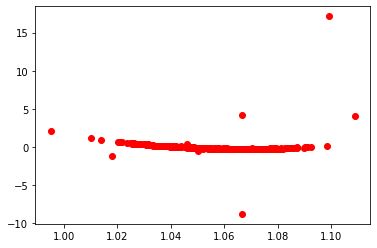

In [ ]:
remainses = Y - (beta_1*X + beta_0)
plt.scatter(X, remainses, color='red')

### 9.1.3. Проверка значимости линейной регрессионной модели
#### а) Указать формулы расчёта показателей, используемых при проверке значимости линейной регрессионной модели

In [ ]:
R_YX = 1 - D_res/D_Y
z = R_YX / ((1 - R_YX )/ (n - 2))
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z = z , p_value = 1 - sps.f(1, n - 2).cdf(z)))

Sign test: z = 10044.028, p-value = 0.000


### 9.2 Линейная регрессионная модель общего вида
#### 9.2.1. Точечные оценки линейной регрессионной модели

In [ ]:
X_2 = []
for a in X:
    X_2.append(a**2)
regression_matrix = np.array([np.array([1]*len(X)), X, X_2]).transpose()
F = np.dot(regression_matrix.transpose(), regression_matrix)
result = np.dot(np.linalg.inv(F), regression_matrix.transpose()).dot(Y)
beta_0 = result[0] 
beta_1 = result[1]
beta_2 = result[2]
print("beta0 = {z1:.1f} \nbeta1 = {z2:.1f} \nbeta2 = {z3:.1f}".format(z1 = result[0], z2 = result[1], z3 = result[2]))

beta0 = 1644.2 
beta1 = -2645.8 
beta2 = 1047.7


#### в) Рассчитать показатели вариации, используемые в регрессионном анализе

In [ ]:
D_YX = 0
k = 2
for key in X_grp:
    D_YX += len(X_grp[key]) / (n-k) * ((np.array(X_grp[key])).mean() - Y.mean())**2
    
D_res = 0
for i in range(n):
    D_res += 1/(n-k) * (Y[i] - (beta_0 + beta_1*X[i] + beta_2*(X[i])**2))**2
    
D_Y = 0 
for i in range(n):
    D_Y += 1/n * (Y[i] - Y.mean())**2

print(D_YX) # непрпаильно

D_YX = D_Y - D_res
print("Факторный признак: {z:.2f}".format(z = D_YX))
print("Остаточные признаки: {z:.2f}".format(z = D_res))
print("Все признаки: {z:.2f}".format(z = D_Y))

70.27632269841273
Факторный признак: 68.29
Остаточные признаки: 1.47
Все признаки: 69.76


#### д) Рассчитать показатели тесноты связи между факторным и результативным признаками

In [ ]:
print("Коэффициент детерминации: {z:.2f}".format(z = (D_YX/D_Y)**(1/2)))
print("Кореляционное отношение: {z:.2f}".format(z = (D_YX/D_Y)))

Коэффициент детерминации: 0.99
Кореляционное отношение: 0.98


### 9.2.2. Интервальные оценки линейной регрессионной модели
#### б) Построить диаграмму рассеяния признаков x и y. Нанести на диаграмму функцию регрессии f(x), а также нижние и верхние границы линии регрессии flow(x) и fhigh(x) на уровне значимости $\alpha$ = 0.1


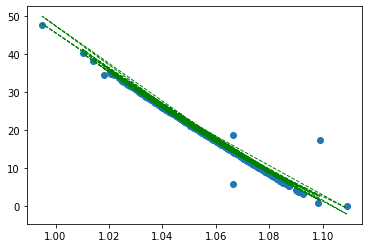

In [ ]:
X_sum = 0
k = 3

new_D_res = 0
for i in range(n):
    new_D_res += 1/(n-k) * ((beta_2 * X[i]**2 + beta_1 * X[i] + beta_0) - Y[i])**2

for i in range(len(X)):
    X_sum += (X[i])**2 
alpha = 0.1
flow = []
fhigh = []
for i in range(n):
    flow.append((beta_2 * X[i]**2 + beta_1 * X[i] + beta_0) - sps.t(n-k).ppf(1-alpha/2)*(new_D_res*(np.dot(np.dot(np.array([1, X[i], X[i]**2]).transpose(), np.linalg.inv(F)), np.array([1, X[i], X[i]**2])))  )**(1/2))
    fhigh.append((beta_2 * X[i]**2 + beta_1 * X[i] + beta_0) + sps.t(n-k).ppf(1-alpha/2)*(new_D_res*(np.dot(np.dot(np.array([1, X[i], X[i]**2]).transpose(), np.linalg.inv(F)), np.array([1, X[i], X[i]**2])))  )**(1/2))


plt.scatter(X, Y)
lin_reg = beta_2 * X**2 + beta_1*X + beta_0


plt.plot(X, fhigh, 'g--', linewidth = 1) # не строится
plt.plot(X, flow, 'g--', linewidth = 1)  # не строится

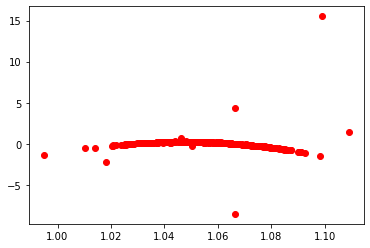

In [ ]:
remainses = Y - (beta_2*X**2+beta_1*X + beta_0)
plt.scatter(X, remainses, color='red')

#### 9.2.3. Проверка значимости линейной регрессионной модели

In [ ]:
R_YX = 1 - D_res/D_Y
z = (R_YX / (k - 1)) / ((1 - R_YX )/ (n - k))
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z = z , p_value = 1 - sps.f(k - 1, n - k).cdf(z)))

Sign test: z = 5796.192, p-value = 0.000


## 9.3 Множественная линейная регрессионная модель
### а) Рассчитать точечные оценки параметров линейной регрессионной модели

In [ ]:
X1 = pd.read_excel(open('data_matstat_K5.xls', 'rb'), sheet_name='B - bodyfat')['B1'].to_numpy()
X2 = pd.read_excel(open('data_matstat_K5.xls', 'rb'), sheet_name='B - bodyfat')['B4'].to_numpy()
Y = pd.read_excel(open('data_matstat_K5.xls', 'rb'), sheet_name='B - bodyfat')['B2'].to_numpy()

n = len(X)